In [1]:
#imput library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler


In [2]:
#imput data 

data = pd.read_csv('Data Skripsi Panen.csv')             
predictors =['Luas_Lahan', 'Jumlah_Bibit', 'Jenis_Pupuk', 'Curah_Hujan','Hama_Gulma', 'Pengendalian_Hama_Gulma', 'Jajar_Legowo']
label = 'Hasil'
data.head()



,Luas_Lahan,Jumlah_Bibit,Jenis_Pupuk,Curah_Hujan,Hama_Gulma,Pengendalian_Hama_Gulma,Jajar_Legowo,Hasil
0,1.4,74.0,Urea. NPK,Rendah,15.0,Pestisida dan Penyiangan,ya,4.675
1,1.0,60.0,Urea. NPK,Rendah,30.5,Pestisida,tidak,2.675
2,0.9,54.0,Urea. NPK,Rendah,20.3,Pestisida dan Penyiangan,tidak,2.761
3,0.8,48.0,Urea. NPK,Rendah,15.0,Pestisida dan Penyiangan,tidak,2.618
4,1.0,60.0,Urea. NPK,Rendah,20.6,Pestisida dan Penyiangan,tidak,3.056


In [3]:
#Daftar Kategorik

le = dict()
for column in data.columns:
    if data[column].dtype == np.object:
        le[column] = LabelEncoder()
        data[column] = le[column].fit_transform(data[column])


C:\Users\Lenovo\AppData\Local\Temp/ipykernel_5388/3541527517.py:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if data[column].dtype == np.object:


In [4]:
#Label encoder
from sklearn import preprocessing
predictors =['Luas_Lahan', 'Jumlah_Bibit', 'Jenis_Pupuk', 'Curah_Hujan','Hama_Gulma', 'Pengendalian_Hama_Gulma', 'Jajar_Legowo']
labelEncoder = preprocessing.LabelEncoder()
data.head()

,Luas_Lahan,Jumlah_Bibit,Jenis_Pupuk,Curah_Hujan,Hama_Gulma,Pengendalian_Hama_Gulma,Jajar_Legowo,Hasil
0,1.4,74.0,2,1,15.0,2,1,4.675
1,1.0,60.0,2,1,30.5,1,0,2.675
2,0.9,54.0,2,1,20.3,2,0,2.761
3,0.8,48.0,2,1,15.0,2,0,2.618
4,1.0,60.0,2,1,20.6,2,0,3.056


In [5]:
#Variabel Independen
X = data.drop(["Hasil"], axis=1)
X.head()

,Luas_Lahan,Jumlah_Bibit,Jenis_Pupuk,Curah_Hujan,Hama_Gulma,Pengendalian_Hama_Gulma,Jajar_Legowo
0,1.4,74.0,2,1,15.0,2,1
1,1.0,60.0,2,1,30.5,1,0
2,0.9,54.0,2,1,20.3,2,0
3,0.8,48.0,2,1,15.0,2,0
4,1.0,60.0,2,1,20.6,2,0


In [6]:
#Variabel Dependen
y=data["Hasil"]
y.head()

0    4.675
1    2.675
2    2.761
3    2.618
4    3.056
Name: Hasil, dtype: float64

In [7]:
#DataTesting dan Training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
test_size=0.3, random_state=1234)

In [8]:
#Proporsi Data Testing dan Training
print(X_train.shape)
print(X_test.shape)

(208, 7)
(90, 7)


In [9]:
X_train

,Luas_Lahan,Jumlah_Bibit,Jenis_Pupuk,Curah_Hujan,Hama_Gulma,Pengendalian_Hama_Gulma,Jajar_Legowo
13,0.70,42.0,2,1,36.6,3,0
32,0.70,42.0,2,1,24.0,2,0
63,1.05,60.5,2,1,28.0,1,0
146,0.90,54.0,3,1,27.1,2,0
115,0.90,54.0,3,1,28.6,2,0
...,...,...,...,...,...,...,...
152,0.80,48.0,2,0,1.5,2,0
204,0.59,35.5,2,0,1.5,2,0
53,0.85,49.5,2,1,20.5,2,0
294,0.59,35.5,3,0,8.6,2,0


In [10]:
X_test

,Luas_Lahan,Jumlah_Bibit,Jenis_Pupuk,Curah_Hujan,Hama_Gulma,Pengendalian_Hama_Gulma,Jajar_Legowo
73,0.65,39.0,2,1,23.2,2,0
110,0.75,45.0,3,1,35.0,2,0
250,0.50,30.0,3,0,1.0,2,0
168,1.25,61.5,3,0,9.0,2,0
288,1.40,78.0,3,0,23.3,2,0
...,...,...,...,...,...,...,...
281,1.80,84.0,3,0,2.0,1,0
111,0.50,30.0,2,1,15.8,2,0
58,0.65,39.0,2,1,25.0,2,0
48,1.40,78.0,2,1,32.0,1,0


In [11]:
y_train

13     1.708
32     2.048
63     2.910
146    2.525
115    2.474
       ...  
152    3.033
204    2.221
53     2.536
294    2.061
211    3.291
Name: Hasil, Length: 208, dtype: float64

In [12]:
y_test

73     1.795
110    1.876
250    1.732
168    4.379
288    4.134
       ...  
281    5.544
111    1.620
58     1.753
48     3.665
274    2.125
Name: Hasil, Length: 90, dtype: float64

In [13]:
data[label]

0      4.675
1      2.675
2      2.761
3      2.618
4      3.056
       ...  
293    1.782
294    2.061
295    3.218
296    2.781
297    3.149
Name: Hasil, Length: 298, dtype: float64

In [14]:
#analisis random forest
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor (n_estimators = 9,random_state=1234)
regressor.fit (X_train, y_train)
y_pred=regressor.predict (X_test)

In [15]:
# membuat model train parameter default

def evaluatetraint(model, X=X_train, y=y_train):
    predictions = model.predict(X=X_train)
    errors = abs(predictions - y_train)
    mape = 100 * np.mean(errors / y_train)
    accuracy = 100 - mape
    
    print ('model performance training')
    print ('average error: {:0,4f} degrees.'.format(np.mean(errors)))
    print ('accuracy = {:0.2f}%.'.format(accuracy))
      
    return accuracy
    
    base_modeltrain = RandomForestRegressor(random_state = 1234)
    base_model.fit(X=X_train, y=y_train)
    base_accuracytrain = evaluatetrain(base_model, X=X_train, y=y_train)

In [16]:
# membuat model test parameter default
def evaluatetest(model, X=X_test, y=y_test):
    predictions = model.predict(X=X_test)
    errorstest = abs(predictionstest - y_test)
    mapetest = 100 * np.mean(errorstest / y_test)
    accuracytest = 100 - mapetest
    
    print ('model performance testing')
    print ('average error: {:0,4f} degrees.'.format(np.mean(errorstest)))
    print ('accuracy = {:0.2f}%.'.format(accuracytest))
        
    return accuracytest
    
    base_modeltest = RandomForestRegressor(random_state = 1234)
    base_model.fit(X=X_test, y=y_test)
    base_accuracytest = evaluatetest(base_model, X=X_test, y=y_test)

In [17]:
#Perhitungan Akurasi
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE :', np.mean(np.abs((y_test - y_pred) / y_test))*100)
print ('Nilai akurasi :', (1-(np.mean(np.abs((y_test - y_pred) / y_test))))*100)

Mean Absolute Error: 0.12887592592592598
Mean Squared Error: 0.060220691255144
Root Mean Squared Error: 0.24539904493527273
MAPE : 4.884126251490757
Nilai akurasi : 95.11587374850924


In [18]:
#Nilai Koefiisien Determinasi Data Testing dan Training
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
y_pred2=regressor.predict(X_train)
r2_score(y_train, y_pred2)

0.9929691605858395

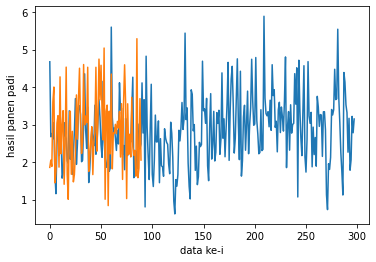

In [19]:
#perbandingan nilai aktual n prediksi 1
import matplotlib.pyplot as plt
plt.plot(y,label="Data Asli")
plt.plot(y_pred, label="Data prediksi")
plt.ylabel('hasil panen padi')
plt.xlabel('data ke-i')
plt.show()





In [20]:
predicts = regressor.predict(X_test)
error_panen = pd.DataFrame({
'Actual Values': np.array(y_test).flatten(),
'Predicted Values': predicts.flatten()})
error_panen.head(90)

,Actual Values,Predicted Values
0,1.795,1.857111
1,1.876,2.051444
2,1.732,1.882222
3,4.379,3.601778
4,4.134,4.001111
...,...,...
85,5.544,5.290778
86,1.620,1.582000
87,1.753,1.837111
88,3.665,3.691444


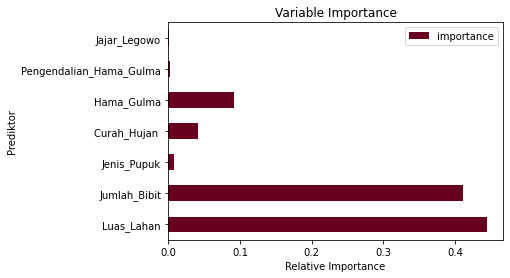

                 Prediktor  importance
0               Luas_Lahan    0.444054
1             Jumlah_Bibit    0.410037
2              Jenis_Pupuk    0.007633
3             Curah_Hujan     0.041804
4               Hama_Gulma    0.092257
5  Pengendalian_Hama_Gulma    0.002623
6             Jajar_Legowo    0.001592


In [21]:

#Feature Importance

features = list(X_train.columns)
feature_importances = pd.DataFrame({'Prediktor': features,'importance': regressor.feature_importances_})
feature_importances .plot(x ='Prediktor', y='importance', kind ='barh',  colormap='RdBu')
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()
print(feature_importances)

In [22]:
#sv model
import pickle
pickle.dump(regressor, open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[1.4,74.0,2,1,15.0,2,1]]))



[4.52022222]
